In [26]:
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
df = pd.read_csv("sales_data_sample.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,Unnamed: 13,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NaN,NYC,NY,USA,NaN,Small
1,10121,34,81.35,5,2765.90,05-07-03 0:00,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,NaN,Reims,NaN,France,EMEA,Small
2,10134,41,94.74,2,3884.34,07-01-03 0:00,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,NaN,Paris,NaN,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,NaN,Pasadena,CA,USA,NaN,Medium
4,10159,49,100.00,14,5205.27,10-10-03 0:00,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,NaN,San Francisco,CA,USA,NaN,Medium


In [32]:
df = pd.read_csv("sales_data_sample.csv", parse_dates=["ORDERDATE"],index_col="ORDERDATE")
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,Unnamed: 13,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,
2003-02-24,10107,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NaN,NYC,NY,USA,NaN,Small
2003-05-07,10121,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,NaN,Reims,NaN,France,EMEA,Small
2003-07-01,10134,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,NaN,Paris,NaN,France,EMEA,Medium
2003-08-25,10145,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,NaN,Pasadena,CA,USA,NaN,Medium
2003-10-10,10159,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,NaN,San Francisco,CA,USA,NaN,Medium


In [33]:
df.drop(columns=['Unnamed: 13','CITY','STATE','TERRITORY','QUANTITYORDERED', 'PRODUCTCODE','PRICEEACH'],inplace = True)
df.drop(columns=['ORDERNUMBER','ORDERLINENUMBER','QTR_ID','MONTH_ID','YEAR_ID','MSRP'],inplace = True)
df.head()

,SALES,PRODUCTLINE,CUSTOMERNAME,COUNTRY,DEALSIZE
ORDERDATE,,,,,
2003-02-24,2871.00,Motorcycles,Land of Toys Inc.,USA,Small
2003-05-07,2765.90,Motorcycles,Reims Collectables,France,Small
2003-07-01,3884.34,Motorcycles,Lyon Souveniers,France,Medium
2003-08-25,3746.70,Motorcycles,Toys4GrownUps.com,USA,Medium
2003-10-10,5205.27,Motorcycles,Corporate Gift Ideas Co.,USA,Medium


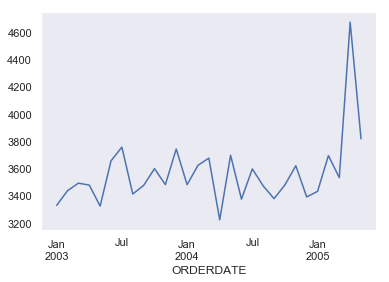

In [54]:
df_usa=df[df['COUNTRY']=='USA']
df_pm=df[df['PRODUCTLINE']=='Motorcycles']
df_pt=df[df['PRODUCTLINE']=='Trains']
# monthly resampling on sales
df['SALES'].resample('M').mean().plot()

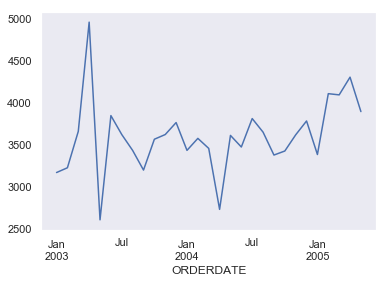

In [36]:
df_usa=df[df['COUNTRY']=='USA']
df_pm=df[df['PRODUCTLINE']=='Motorcycles']
df_usa['SALES'].resample('M').mean().plot()

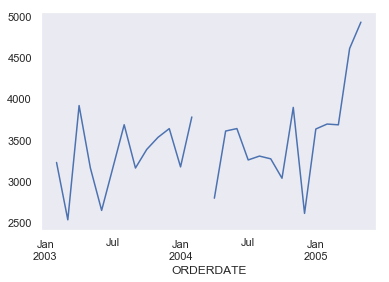

In [37]:
df_pm['SALES'].resample('M').mean().plot()

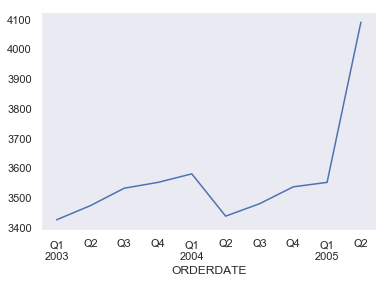

In [38]:
#Quarterly
df['SALES'].resample('Q').mean().plot()

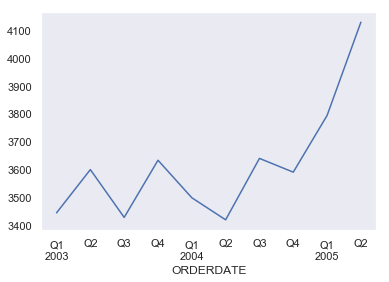

In [39]:
df_usa['SALES'].resample('Q').mean().plot()

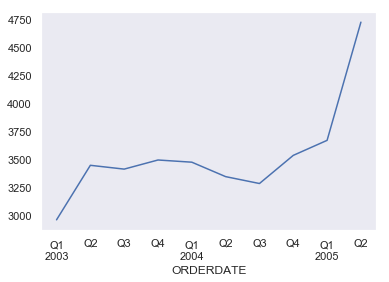

In [40]:
#Visualization of motorcycle data quarterly
df_pm['SALES'].resample('Q').mean().plot()

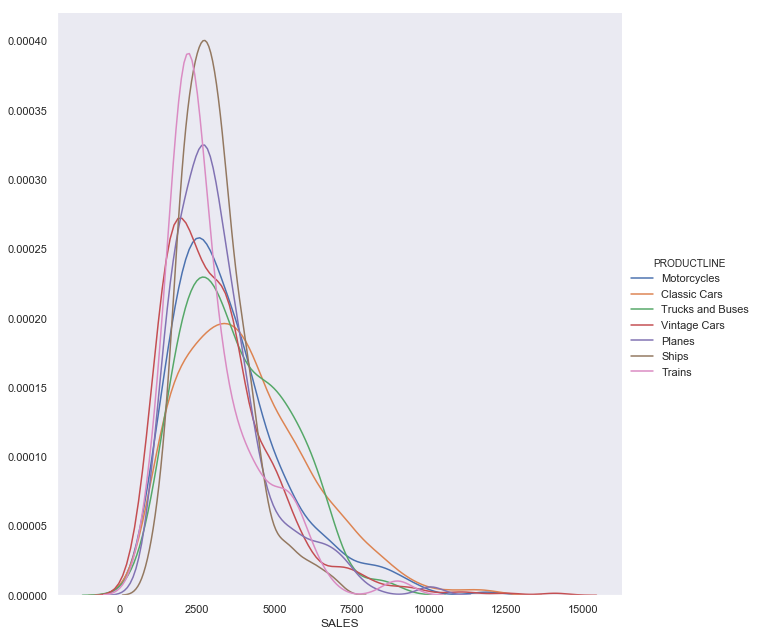

In [49]:
sns.FacetGrid(df, hue="PRODUCTLINE", height=9) \
   .map(sns.kdeplot, "SALES").add_legend()
# get graphs for df_pm, df_usa, change hue for better visualization

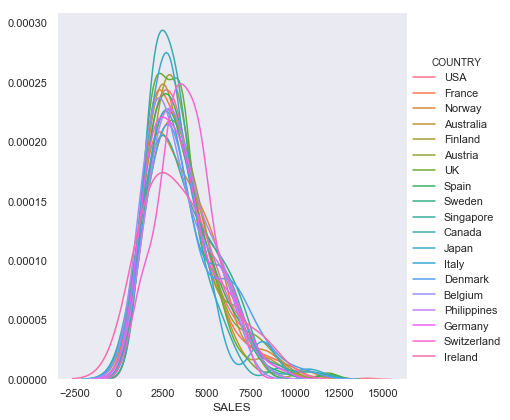

In [42]:
sns.FacetGrid(df, hue="COUNTRY", height=6) \
   .map(sns.kdeplot, "SALES").add_legend()

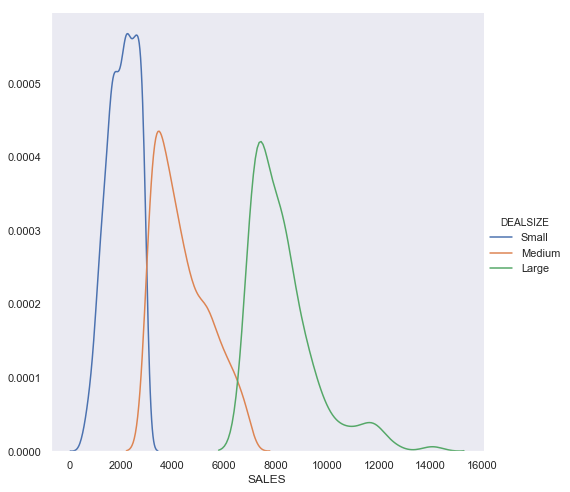

In [45]:
sns.FacetGrid(df, hue="DEALSIZE", height=7) \
   .map(sns.kdeplot, "SALES").add_legend()

In [50]:
#Determine pivot table
import numpy as np
impute_grps = df.pivot_table(values=["SALES"], index=["COUNTRY","PRODUCTLINE","DEALSIZE"], aggfunc=np.mean)
print (impute_grps)

                                           SALES
COUNTRY   PRODUCTLINE      DEALSIZE             
Australia Classic Cars     Large     8220.920000
                           Medium    4555.124643
                           Small     2134.791739
          Motorcycles      Large     9519.445000
                           Medium    4285.091111
                           Small     2157.603333
          Planes           Medium    3936.615000
                           Small     2124.191538
          Ships            Medium    3070.400000
                           Small     1089.360000
          Trains           Small     1681.350000
          Trucks and Buses Large     8470.140000
                           Medium    4751.434545
                           Small     2072.822500
          Vintage Cars     Large     8150.585000
                           Medium    4502.405200
                           Small     1957.871613
Austria   Classic Cars     Large     8467.800000
                    

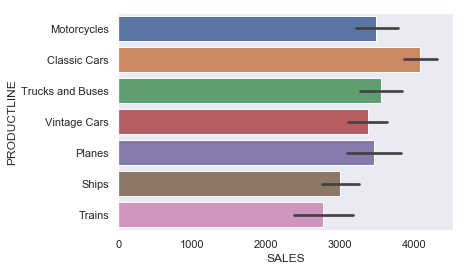

In [53]:
sns.barplot(data=df_usa, x='SALES', y='PRODUCTLINE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EF022D208>]],
      dtype=object)

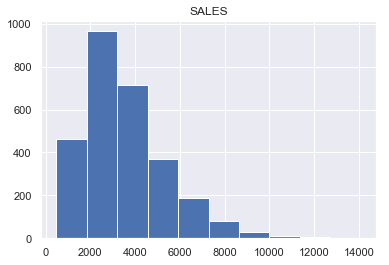

In [55]:
df.hist()

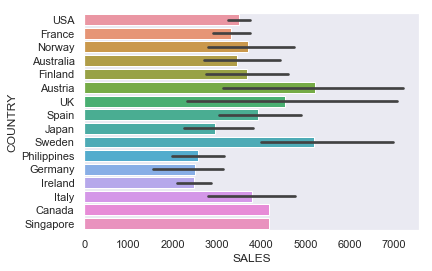

In [57]:
sns.barplot(data=df_pm, x='SALES', y='COUNTRY')

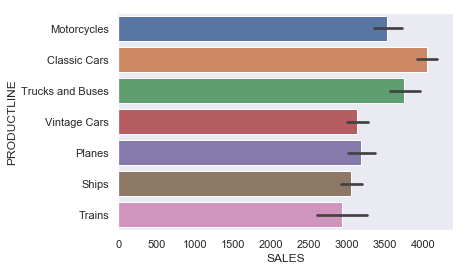

In [58]:
sns.barplot(data=df, x='SALES', y='PRODUCTLINE')

In [18]:
df["PRODUCTLINE"].plot(kind="scatter", x="MONTH_ID", y="QUANTITY ORDERED")

ValueError: plot kind 'scatter' can only be used for data frames

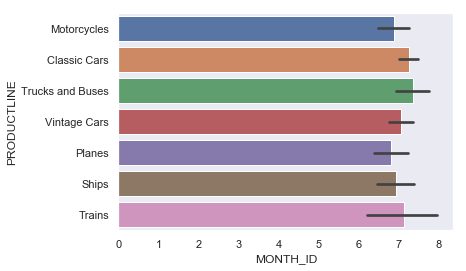

In [19]:
sns.barplot(data=df, x='MONTH_ID', y='PRODUCTLINE')

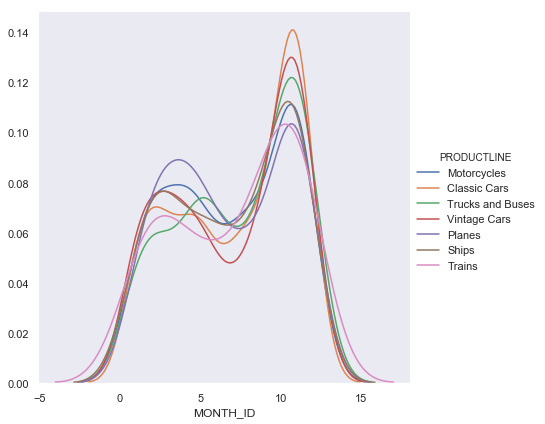

In [20]:
sns.FacetGrid(df, hue="PRODUCTLINE", height=6) \
   .map(sns.kdeplot, "MONTH_ID").add_legend()

In [21]:
ac.parallel_coordinates(df.drop("Id", axis=1), "PRODUCTLINE")

NameError: name 'ac' is not defined

In [22]:
import pandas.tools.plotting as ac

In [23]:
ac.parallel_coordinates(df.drop("Id", axis=1), "PRODUCTLINE")

KeyError: "['Id'] not found in axis"

In [24]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,Unnamed: 13,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NaN,NYC,NY,USA,NaN,Small
1,10121,34,81.35,5,2765.90,05-07-03 0:00,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,NaN,Reims,NaN,France,EMEA,Small
2,10134,41,94.74,2,3884.34,07-01-03 0:00,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,NaN,Paris,NaN,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,NaN,Pasadena,CA,USA,NaN,Medium
4,10159,49,100.00,14,5205.27,10-10-03 0:00,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,NaN,San Francisco,CA,USA,NaN,Medium


TypeError: can't multiply sequence by non-int of type 'float'

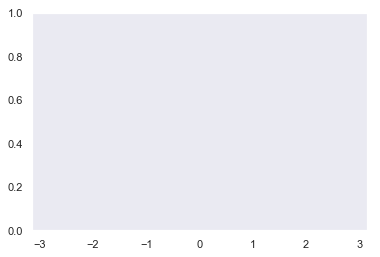

In [25]:
#from pandas.tools.plotting import andrews_curves
ac.andrews_curves(df.drop("MONTH_ID", axis=1), "PRODUCTLINE")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
ORDERNUMBER        2823 non-null int64
QUANTITYORDERED    2823 non-null int64
PRICEEACH          2823 non-null float64
ORDERLINENUMBER    2823 non-null int64
SALES              2823 non-null float64
ORDERDATE          2823 non-null object
QTR_ID             2823 non-null int64
MONTH_ID           2823 non-null int64
YEAR_ID            2823 non-null int64
PRODUCTLINE        2823 non-null object
MSRP               2823 non-null int64
PRODUCTCODE        2823 non-null object
CUSTOMERNAME       2823 non-null object
Unnamed: 13        0 non-null float64
CITY               2823 non-null object
STATE              1337 non-null object
COUNTRY            2823 non-null object
TERRITORY          1749 non-null object
DEALSIZE           2823 non-null object
dtypes: float64(3), int64(7), object(9)
memory usage: 419.1+ KB


In [27]:
df_usa=df[df['COUNTRY']=="USA"]

In [28]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,Unnamed: 13,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NaN,NYC,NY,USA,NaN,Small
1,10121,34,81.35,5,2765.90,05-07-03 0:00,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,NaN,Reims,NaN,France,EMEA,Small
2,10134,41,94.74,2,3884.34,07-01-03 0:00,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,NaN,Paris,NaN,France,EMEA,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,NaN,Pasadena,CA,USA,NaN,Medium
4,10159,49,100.00,14,5205.27,10-10-03 0:00,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,NaN,San Francisco,CA,USA,NaN,Medium


In [29]:
df_usa.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,Unnamed: 13,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NaN,NYC,NY,USA,NaN,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,NaN,Pasadena,CA,USA,NaN,Medium
4,10159,49,100.00,14,5205.27,10-10-03 0:00,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,NaN,San Francisco,CA,USA,NaN,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,NaN,Burlingame,CA,USA,NaN,Medium
8,10201,22,98.57,2,2168.54,12-01-03 0:00,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,NaN,San Francisco,CA,USA,NaN,Small


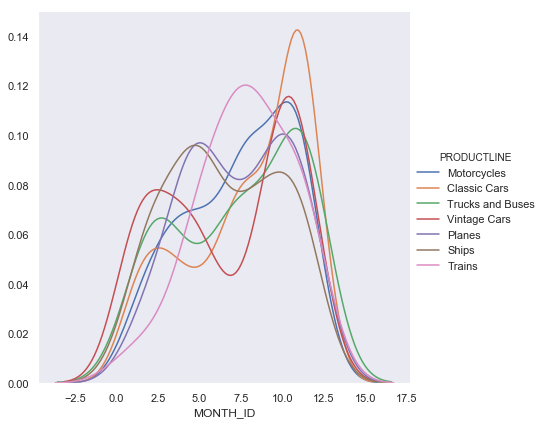

In [30]:
sns.FacetGrid(df_usa, hue="PRODUCTLINE", height=6) \
   .map(sns.kdeplot, "MONTH_ID").add_legend()